**name: sabiha begum**
**id  : 8896658**

**PART-A**

Use the Lab2 dataset provided. Load the dataset and split it into test and train. After that, train the model using Gaussian and Multinominal classifiers and post which model performs better. Use the trained model to perform some predictions on test data.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB

In [2]:
# Load the dataset
data = pd.read_csv('Lab2_dataset.csv')
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [3]:
# Check for null values in the dataset
null_values = data.isnull().sum()

# Display the columns with null values
columns_with_null = null_values[null_values > 0]
print("Columns with null values:")
print(columns_with_null)

# Count the total number of null values in the dataset
total_null_values = null_values.sum()
print("Total null values:", total_null_values)

Columns with null values:
Series([], dtype: int64)
Total null values: 0


In [4]:
# Get the current column names
current_columns = data.columns

# Check if there is an unnamed column
if 'Unnamed: 0' in current_columns:
    # Rename the unnamed column to a desired name
    data.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)  

# Print the updated column names
print("Updated column names are :")
print(data.columns)


Updated column names are :
Index(['ID', 'label', 'text', 'label_num'], dtype='object')


In [5]:
data

,ID,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [6]:
# Split the dataset into features (X) and labels (y)
X = data['text']  
y = data['label_num']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

In [9]:
# Fit the vectorizer to the training data and transform the text into numerical features
X_train_vectorized = vectorizer.fit_transform(X_train)

In [10]:
# Train the Gaussian Naive Bayes model using the vectorized training data
model = GaussianNB()
model.fit(X_train_vectorized.toarray(), y_train)

GaussianNB()

In [11]:
# Transform the test data using the trained vectorizer
X_test_vectorized = vectorizer.transform(X_test)

In [12]:
# Make predictions on the test data using the trained model
predictions = model.predict(X_test_vectorized.toarray())

In [13]:
# Evaluate the model
accuracy = (predictions == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.9545893719806763


In [14]:
# Train Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB


mnb = MultinomialNB()
mnb.fit(X_train_vectorized, y_train)

MultinomialNB()

In [15]:
# Make predictions on the test set

mnb_predictions = mnb.predict(X_test_vectorized)

In [16]:

# Evaluate the model
accuracy = (mnb_predictions == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.9719806763285024


**PART-B**

Use this air bnb new york city dataset and remove outliers based on price per night for a given apartment/home. You can demonstrate why using other techniques like mean/median/ percentile works. The task is to come up with a clean dataset that does not have outliers showcasing all the possibilities.

In [17]:
# Load the dataset
data = pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [18]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [19]:
print(data.describe())

                 id       host_id      latitude     longitude         price   
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000  \
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month   
count    48895.000000       48895.000000       38843.000000  \
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

In [20]:
# Check for null values in the dataset
null_values = data.isnull().sum()

# Display the columns with null values
columns_with_null = null_values[null_values > 0]
print("Columns with null values:")
print(columns_with_null)

# Count the total number of null values in the dataset
total_null_values = null_values.sum()
print("Total null values:", total_null_values)

#duplicate rows
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)


Columns with null values:
name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64
Total null values: 20141
Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


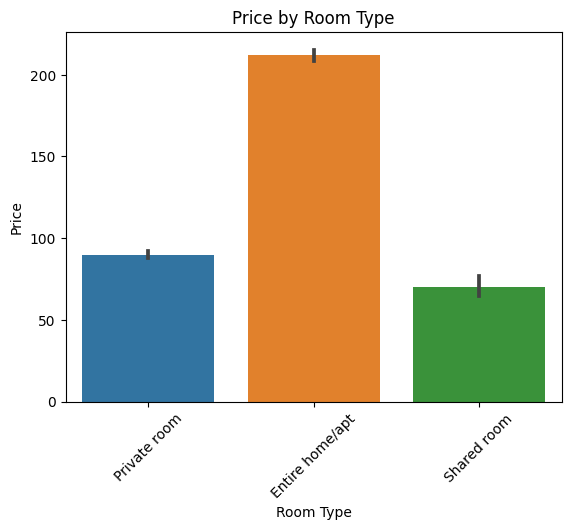

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

# Creating the bar plot using seaborn
sns.barplot(data=data, x='room_type', y='price')

# Adding labels and title to the plot
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price by Room Type')

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


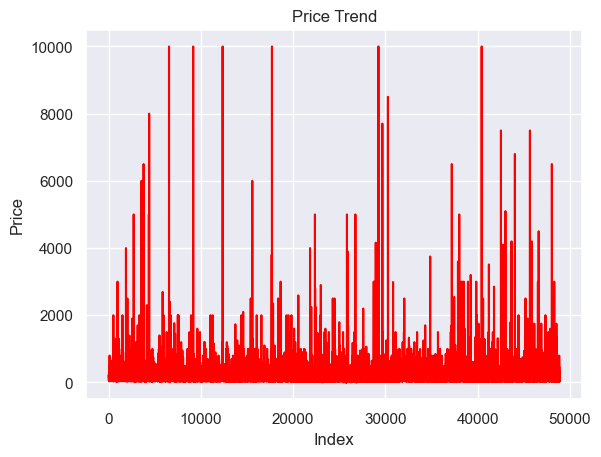

In [22]:
import seaborn as sns

# Setting the style of the plot
sns.set(style='darkgrid')

# Creating the line plot
sns.lineplot(data=data['price'], color='red')

# Adding labels and title to the plot
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Price Trend')

# Displaying the plot
plt.show()

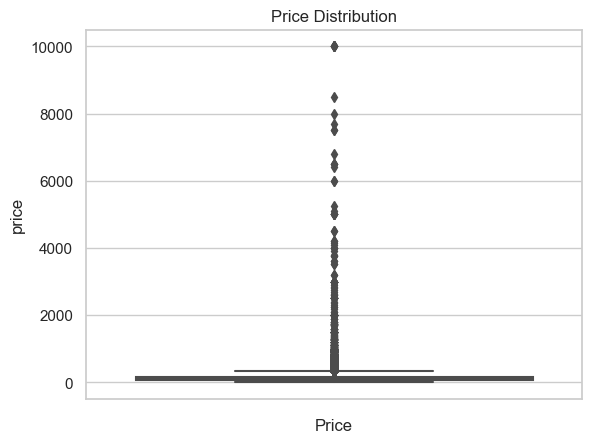

In [23]:
# Setting the style of the plot
sns.set(style='whitegrid')

# Creating the boxplot
sns.boxplot(y=data['price'])

# Adding labels and title to the plot
plt.xlabel('Price')
plt.title('Price Distribution')

# Displaying the plot
plt.show()

In [24]:
# Calculating the mean
mean_price = data['price'].mean()

# Calculating the median
median_price = data['price'].median()

# Printing the mean and median
print("Mean Price:", mean_price)

print("Median Price:", median_price)

Mean Price: 152.7206871868289
Median Price: 106.0


In [25]:

# Calculating the minimum price
min_price = data['price'].min()

# Calculating the maximum price
max_price = data['price'].max()

# Printing the minimum and maximum prices
print("Minimum Price:", min_price)
print("Maximum Price:", max_price)


Minimum Price: 0
Maximum Price: 10000


In [26]:

# Descriptive summary of 'price' column
price_d = data['price'].describe()

# Printing the descriptive summary
print(price_d)


count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


In [27]:

# Calculate the first quartile (Q1)
q1 = data['price'].quantile(0.25)

# Calculate the third quartile (Q3)
q3 = data['price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Print the calculated IQR
print("Interquartile Range (IQR):", iqr)




Interquartile Range (IQR): 106.0


In [28]:

# Define the lower and upper bounds
lower_bound = max(min(data['price']),(q1 - (1.5*iqr)))
upper_bound = q3 + (1.5 * iqr)
print(lower_bound)
print(upper_bound)




0
334.0


In [29]:
# Identify outlier
outlier= data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]

print("Outlier:", outlier[['id','price']])

# List of id to be delete
outlier_id = list(outlier['id'])

Outlier:              id  price
61        15396    375
85        19601    800
103       23686    500
114       26933    350
121       27659    400
...         ...    ...
48758  36420289    350
48833  36450896    475
48839  36452721    800
48842  36453160    350
48856  36457700    345

[2972 rows x 2 columns]


In [30]:
# Filter the dataframe to exclude outliers
filtered_data = data[~data['id'].isin(outlier_id)]
print(filtered_data)
len(filtered_data)

             id                                               name   host_id   
0          2539                 Clean & quiet apt home by the park      2787  \
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_grou

45923

In [31]:
# Calculating the mean
mean_price = filtered_data['price'].mean()

# Calculating the median
median_price = filtered_data['price'].median()

# Printing the mean and median
print("Mean Price:", mean_price)

print("Median Price:", median_price)

Mean Price: 119.97031988328288
Median Price: 100.0


In [32]:
# Calculating the minimum price
min_price = filtered_data['price'].min()

# Calculating the maximum price
max_price = filtered_data['price'].max()

# Printing the minimum and maximum prices
print("Minimum Price:", min_price)
print("Maximum Price:", max_price)

Minimum Price: 0
Maximum Price: 334


In [33]:
# Descriptive summary of 'price' column
price_dp = filtered_data['price'].describe()

# Print the descriptive summary
print(price_dp)


count    45923.000000
mean       119.970320
std         68.150148
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        334.000000
Name: price, dtype: float64


After removing outliers using IQR ,there is a cleaned final dataset at the final

In [34]:
print("data with outliers:", price_d )
print("-------------------------------")
print("data without outliers:", price_dp )


data with outliers: count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64
-------------------------------
data without outliers: count    45923.000000
mean       119.970320
std         68.150148
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        334.000000
Name: price, dtype: float64
